<a href="https://colab.research.google.com/github/Raghuramas94/PROJECT-1/blob/master/FOURTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


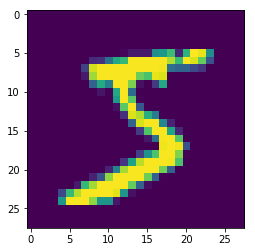

In [43]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [46]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [48]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())


model.add(Convolution2D(14, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(Dropout(0.1))

#model.add(MaxPooling2D(pool_size=(2, 2))) # 10

model.add(Convolution2D(14, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu')) #9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`


In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_35 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 14)        2030      
_________________________________________________________________
batch_normalization_36 (Batc (None, 24, 24, 14)        56        
_________________________________________________________________
dropout_35 (Dropout)         (None, 24, 24, 14)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 22, 22, 10)        1270      
_________________________________________________________________
batch_normalization_37 (Batc (None, 22, 22, 10)        40        
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [77]:
model.fit(X_train, Y_train, batch_size=16, nb_epoch=10, verbose=1)

Epoch 1/10
  176/60000 [..............................] - ETA: 52s - loss: 0.0077 - acc: 1.0000 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 42s 696us/step - loss: 0.0376 - acc: 0.9883
Epoch 2/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.0299 - acc: 0.9903
Epoch 3/10
60000/60000 [==============================] - 40s 673us/step - loss: 0.0292 - acc: 0.9907
Epoch 4/10
60000/60000 [==============================] - 40s 664us/step - loss: 0.0269 - acc: 0.9912
Epoch 5/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.0261 - acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.0236 - acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 40s 665us/step - loss: 0.0247 - acc: 0.9921
Epoch 8/10
60000/60000 [==============================] - 40s 667us/step - loss: 0.0235 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 41s 676us/step - loss: 0.0243 - acc: 0.9918
Epoch 10/10
60000/60000 [==============================] - 40s 662us/step - loss: 0.0228 - ac

In [78]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=20, verbose=1)

Epoch 1/20
 2560/60000 [>.............................] - ETA: 4s - loss: 0.0288 - acc: 0.9891

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 4s 60us/step - loss: 0.0150 - acc: 0.9952
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0116 - acc: 0.9962
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0116 - acc: 0.9962
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0104 - acc: 0.9966
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0109 - acc: 0.9964
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0103 - acc: 0.9969
Epoch 7/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0102 - acc: 0.9965
Epoch 8/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0095 - acc: 0.9972
Epoch 9/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0099 - acc: 0.9967
Epoch 10/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0088 - acc: 0.9973
Epoch 11/2

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [80]:
print(score)

[0.022410184345480866, 0.994]


In [0]:
y_pred = model.predict(X_test)

In [74]:
print(y_pred[:9])
print(y_test[:9])

[[1.64714437e-10 3.29219407e-09 1.50858845e-08 4.03967242e-08
  2.97035312e-14 1.77951071e-10 1.35272187e-14 1.00000000e+00
  3.50816880e-12 9.50522594e-09]
 [1.33939313e-08 3.52174595e-07 9.99999642e-01 3.45670959e-09
  1.52440316e-09 6.34296853e-15 1.81685724e-08 1.03282018e-11
  1.80132437e-10 1.81904662e-14]
 [3.35272232e-09 9.99999404e-01 5.89249112e-08 1.16369969e-09
  1.50468608e-07 7.34750305e-09 3.05250936e-08 2.98564686e-07
  1.87507632e-09 1.03617714e-09]
 [9.99999523e-01 2.27176527e-13 4.84945917e-10 1.02046527e-09
  9.07778887e-12 1.91125693e-09 3.89491277e-07 1.06883016e-10
  7.33993977e-09 1.21487460e-07]
 [2.18652180e-10 2.86820186e-11 7.57897123e-09 1.51966304e-11
  9.99960899e-01 2.38603560e-12 2.53886329e-10 1.86047655e-09
  1.28867583e-08 3.90511741e-05]
 [1.11284237e-09 9.99997973e-01 1.83149098e-07 5.95046998e-11
  6.78601069e-08 3.61125643e-11 1.12779848e-08 1.70756641e-06
  6.02421057e-10 9.23994548e-10]
 [2.95711094e-14 1.52892432e-09 3.44229996e-08 2.71782822e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [76]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored

#SUMMARY

In ths network, the number of parameters has been reduced to 12000 and the batch size has been reduced to 16 from 32. The network is able to train at a rate to produce an accuracy of 99.4 even when the parameters and the batch size are reduced.
